# Machine Learning - 03 Decision Tree

In [1]:
from IPython.display import Image

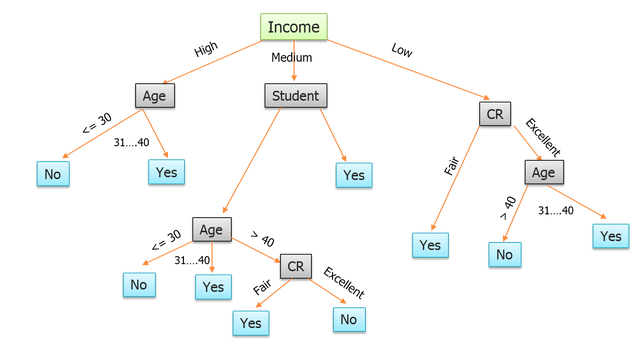

In [3]:
no = "045"
w = 500
img_path1 = "/Users/minkyukwon/PycharmProjects/MachineLearning_Course/10_1_ML_Intro/ref_img/img_"
img_path2 = ".png"
img_path = img_path1 + no + img_path2
Image(filename=img_path, width=w)

### 특징  
* 설명하기가 아주 편하고 직관적임!  
* 크기가 커지면 오버비팅이 심할 수 있음 
* 실질적으로 성능이 아주 좋지가 않아서, 일반적으로 잘 사용은 하지 않음  
* 다만, 요즘 단순 Decision Tree를 사용하지 않고, Random Forest나 다른 방식의 Tree를 많이 사용한다.  
* 예전에는 일단  Random Forest 에 넣어서 확인을 하고 사용했다면, 요즘은 Random Forest나 Xgboost 를 Random Forest 대용을 더 많이 사용하고 있다.

## 참고 : Scikit-Learn의 preprocessing  관련 사항  
* 스케일링[scaling] : 자료 크기 조정  
(목적 : overflow, underflow 를 방지하고, 독립변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴속도 향상)
scale - StandardScaler[표준정상분포 Standard Normal Gaussian 기본 스케일]  
normalize - Normalizer  
minmax_scale - MinMaxScaler[최대/최소값 사용]  
maxabs_scale - MaxAbsScaler[최대절대값 사용]  
robust_scale - RobustScaler[median, interquartile range 사용. outlier 영향 최소화]  

* 인코딩[Encoding]: 카테고리 값의 정수 표현  
(인코딩 : 카테고리 값이나 텍스트 정보를 처리할 수 있는 정수로 변환하는 프로세스)  
binarize - Binarizer[th 값을 기준으로 0/1로 처리하는 것]  
label_binarize - LabelBinarizer[onehot과 유사하지만, 사용되는 카테고리만 사용하여 컬럼으로 ]  
LabelEncoder[k 개의 종류가 있다면 0~k-1까지의 정수로 단순히 변경해서 수행]  
OneHotEncoder[k개의 값을 가지는 스칼라 값을 0또는 1의 값을 가지는 k차원의 벡터로 변환]  
DictVectorizer[주로 텍스트에서 원드별로 카운트와 관련된 것 처리할 때]  

* Imputation: 결손 데이터(missing data) 처리  
Imputer

* Transform: 데이터 변환 
PolynomialFeatures[x를 1, x, x^2, x^3 ..등으로 표현하는 것]  
FunctionTransformer[Transform으로 f함수 통해서 변형]


* 참고 : One-Hot-Encoder[번주형 변수 처리하는데 많이 사용되는 방법 중 하나]  
범주형 변수로 성별으로 남/여 처럼 되어 있으면 2가지로 코딩이 되는데, 이 보다 많은 종류를 가지게 되는 경우에는 어떻게 할것인가 문제가 된다.  
등급을 10등급으로 한다고 하면, 실제 트리상에서는 2^10으로 1024가지의 경우를 판단해야 한다.  
그래서 거의 32개로 되어 있으면, 그 양만해도 2^32으로 심각하게 오버로딩이 많이 걸리게 된다. 
그래서 거의 dummy variable encoding 방식이라고 이해하면 됨.  
아래 그림을 보면 제일 확실히 이해가 됨!  

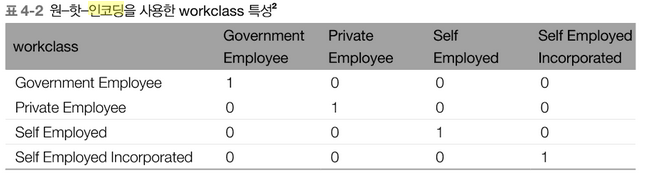

In [4]:
no = "046"
w = 500
img_path1 = "/Users/minkyukwon/PycharmProjects/MachineLearning_Course/10_1_ML_Intro/ref_img/img_"
img_path2 = ".png"
img_path = img_path1 + no + img_path2
Image(filename=img_path, width=w)
# ref : 파이썬 라이브러리를 활용한 머신러닝: 사이킷런 핵심 개발자가 쓴 머신러닝과 데이터~~

## Regression Tree

*  data : Hitters.csv[야구 선수 급여]

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn import metrics  

%matplotlib inline


In [56]:
path = "data/Hitters.csv"
Hitters = pd.read_csv(path)
Hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
Unnamed: 0    322 non-null object
AtBat         322 non-null int64
Hits          322 non-null int64
HmRun         322 non-null int64
Runs          322 non-null int64
RBI           322 non-null int64
Walks         322 non-null int64
Years         322 non-null int64
CAtBat        322 non-null int64
CHits         322 non-null int64
CHmRun        322 non-null int64
CRuns         322 non-null int64
CRBI          322 non-null int64
CWalks        322 non-null int64
League        322 non-null object
Division      322 non-null object
PutOuts       322 non-null int64
Assists       322 non-null int64
Errors        322 non-null int64
Salary        263 non-null float64
NewLeague     322 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 53.0+ KB


In [5]:
Hitters.head(5)

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


* 관찰 데이터 : 322  
* 컬럼 : 21개[ Unnamed: 0 , League, Division, NewLeague 은 숫자형 데이터가 아님 ]  
* 결과 변수 :  'Salary'는 263개 but 전체 322개 데이터 중에서 실제 salary 데이터가 263개만 있음;;;;;;

### 데이터 처리  
* salary 의 값이 없는 observation 제거  
* Unnamed:0 컬럼이름 변경 & - 제거  
* 결과 변수 salary의 log변환

In [57]:
Hitters.dropna(inplace=True)
Hitters.shape
# --> 관찰 데이터 수 적어짐..

(263, 21)

In [58]:
# 컬럼 이름 변경
Hitters.rename(columns = {'Unnamed: 0':'Name'}, inplace=True)

In [64]:
Hitters.columns

Index(['Name', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [59]:
# lambda apply 이용해서 - 제거
Hitters['Name'] = Hitters['Name'].map(lambda x: x.replace("-",""))

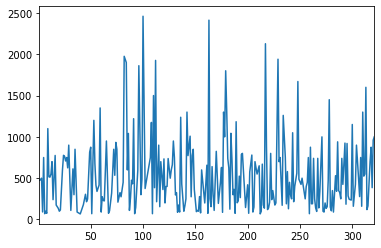

In [60]:
Hitters.Salary.plot()

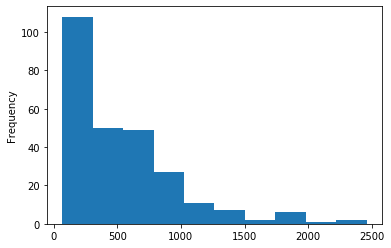

In [61]:
Hitters.Salary.plot(kind="hist")

In [53]:
# log변경
Hitters['Salary'] = np.log(Hitters.Salary)   # 책에서와 같이 'Salary'를 log 변환 

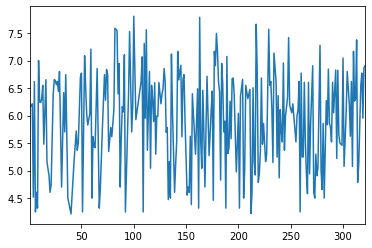

In [54]:
Hitters.Salary.plot()

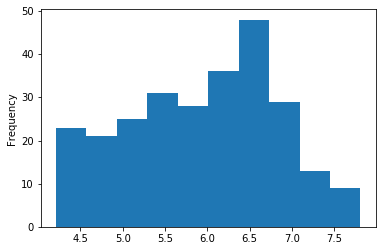

In [55]:
Hitters.Salary.plot(kind="hist")

In [65]:
# reindex
Hitters.dropna(inplace=True)
Hitters.reset_index(drop=True)
Hitters.head(3)

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N


In [11]:
X = Hitters.loc[:,['Years', 'Hits']]     
y = Hitters.Salary                       

reg_tree = tree.DecisionTreeRegressor(max_leaf_nodes=3) 
reg_tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=3, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

* 원래 pydotplus를 이용해서 보여주는데, 지금 해당 패키지가 유지보수중이라서 다른 형식으로 처리함.

Text(13, 180, 'R3')

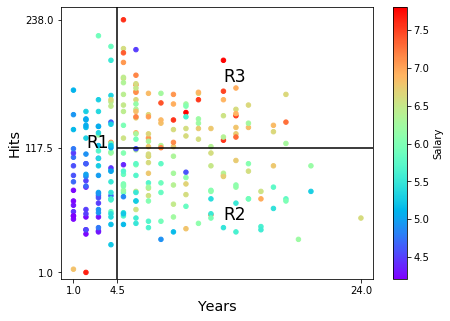

In [12]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))          

Hitters.plot('Years','Hits', kind='scatter',c = 'Salary',
             ax=ax1, xticks=[1, 4.5, 24], yticks=[1, 117.5, 238], 
             xlim=[0, 25], ylim=[-5, 250], cmap='rainbow') 

plt.xlabel('Years', fontsize='x-large')
plt.ylabel('Hits', fontsize='x-large')
plt.vlines(4.5,  ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize=17)
plt.annotate('R2', xy=(13,50), fontsize=17)
plt.annotate('R3', xy=(13,180), fontsize=17)

In [13]:
reg_tree.tree_.threshold

array([  4.5,  -2. , 117.5,  -2. ,  -2. ])

? 아래는 윈도우에서 아래 pydotplus의 기능이 graphviz 로 인해서 안 될 경우.
먼저 구글의 graphviz 에 가서 윈도우 용으로 설치를 한 이후에...       
1) anaconda navigator에서 pydotplus 설치   
2) graphviz 윈도우에 설치    
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'


/Users/minkyukwon/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


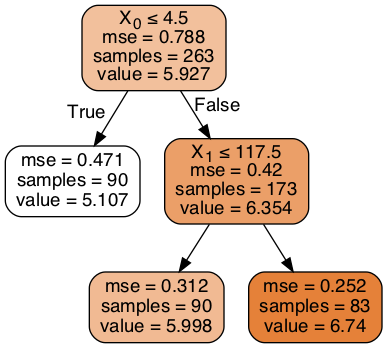

In [14]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(reg_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

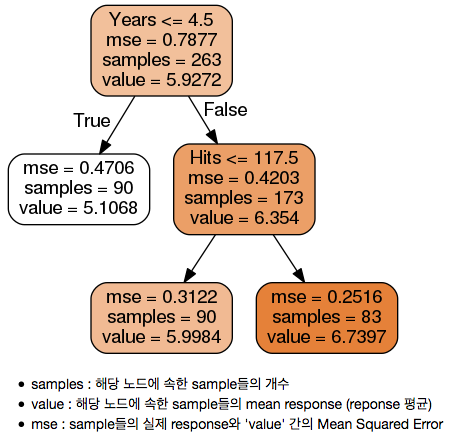

In [50]:
no = "047"
w = 500
img_path1 = "/Users/minkyukwon/PycharmProjects/MachineLearning_Course/10_1_ML_Intro/ref_img/img_"
img_path2 = ".png"
img_path = img_path1 + no + img_path2
Image(filename=img_path, width=w)

* Full 로 한 번 던져보기!

In [72]:
Hitters_enc.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


In [71]:
# Hitters 데이터 중에 qualitative 변수가 있으므로 이를 
# dummy encoding &'Name' column을 제거 
Hitters_enc = pd.get_dummies(Hitters.drop('Name', axis=1), drop_first=True)

# 모든 observation 활용 
X = Hitters_enc.drop('Salary', axis=1)
y = Hitters_enc.Salary

# 최대 12단계로..
reg_tree = tree.DecisionTreeRegressor(max_leaf_nodes=12)
reg_tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=12, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [16]:
reg_tree.tree_.threshold

array([ 1.4520e+03,  1.8200e+02,  1.1750e+02,  6.0000e+00,  4.6500e+02,
       -2.0000e+00,  1.3200e+02,  7.9500e+01,  2.7300e+02,  2.8825e+03,
        6.0500e+01, -2.0000e+00, -2.0000e+00, -2.0000e+00, -2.0000e+00,
        2.1000e+01, -2.0000e+00, -2.0000e+00, -2.0000e+00, -2.0000e+00,
       -2.0000e+00, -2.0000e+00, -2.0000e+00])

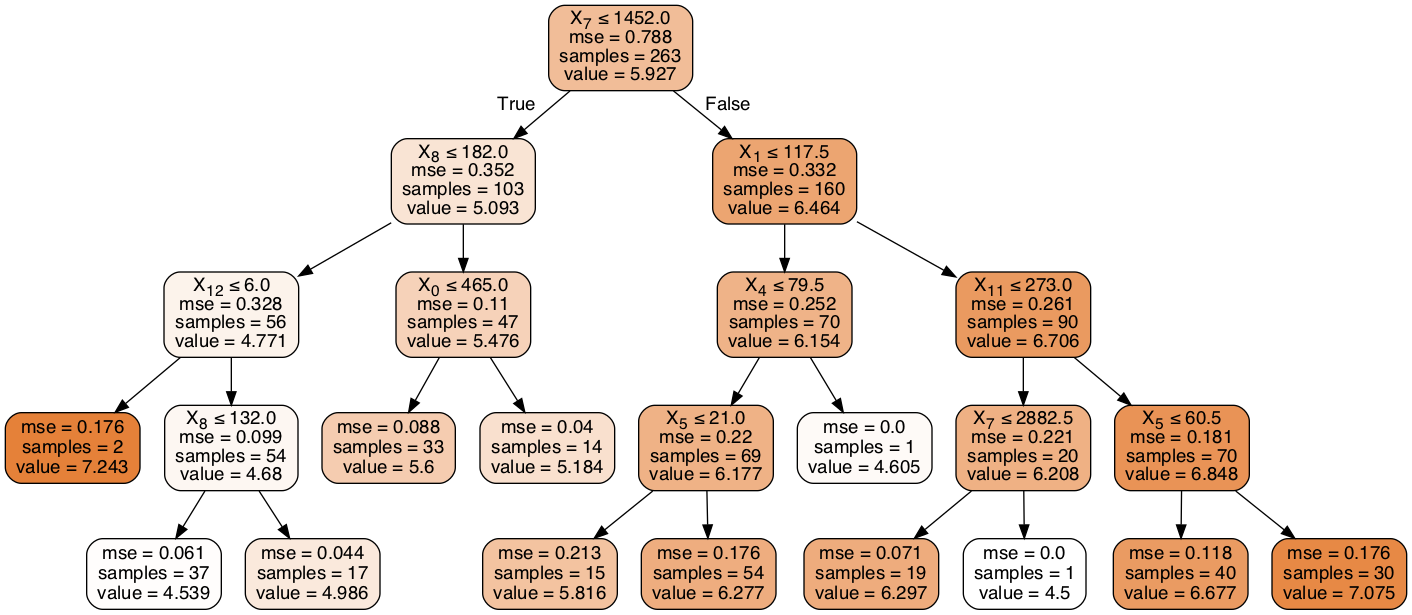

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(reg_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

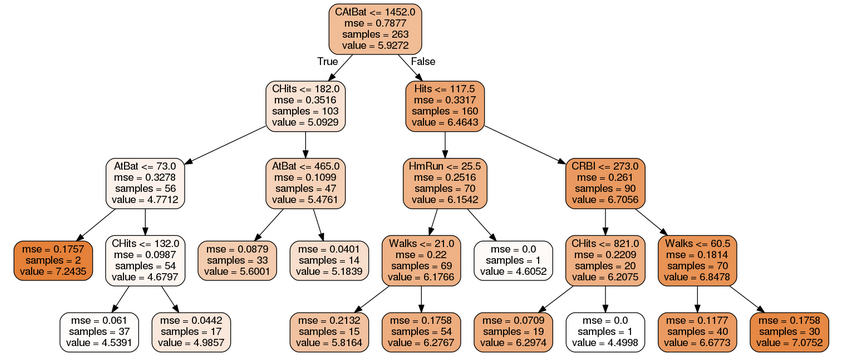

In [55]:
no = "048"
w = 500
img_path1 = "/Users/minkyukwon/PycharmProjects/MachineLearning_Course/10_1_ML_Intro/ref_img/img_"
img_path2 = ".png"
img_path = img_path1 + no + img_path2
Image(filename=img_path, width=w)

* 그럼 어느 단계까지 해야 좋은가? --> 파라미터 튜닝!

In [18]:
from sklearn.model_selection import cross_val_score

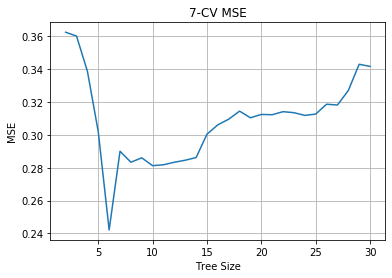

In [19]:
tree_sizes = range(2, 31)
MSE_scores = []
# 7 으로..7-fold
for size in tree_sizes:
    reg_tree = tree.DecisionTreeRegressor(max_leaf_nodes=size, random_state=123)
    MSE_s = -cross_val_score(reg_tree, X, y, cv=7, scoring='neg_mean_squared_error')
    MSE_scores.append(np.mean(MSE_s))

# plot CV-MSE as tree size gets bigger 
plt.plot(tree_sizes, MSE_scores)
plt.title('7-CV MSE')
plt.xlabel('Tree Size')
plt.ylabel('MSE')
plt.grid(True)

* 6개로 하면 제일 좋은 성능이 나오네~~

In [20]:
# 그러니 이제 다시 6개로 수행
reg_tree_best = tree.DecisionTreeRegressor(max_leaf_nodes=6, random_state=1234)
reg_tree_best.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=6, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

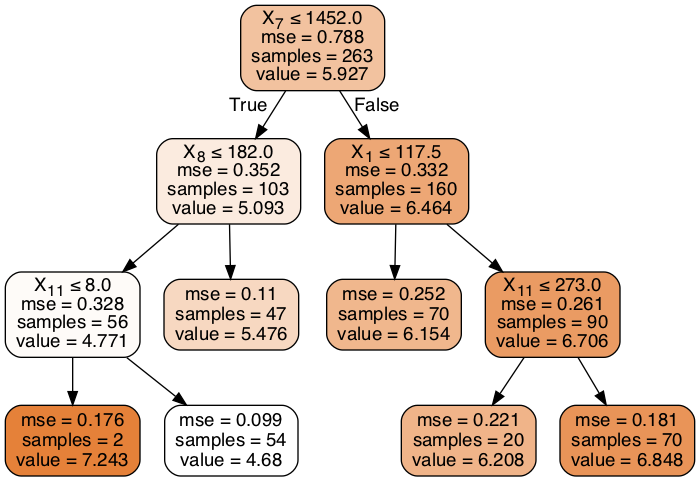

In [21]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(reg_tree_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

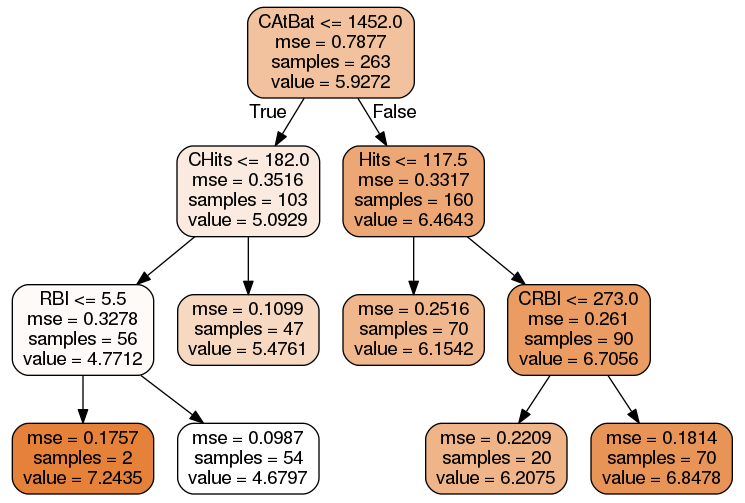

In [66]:
no = "049"
w = 800
img_path1 = "/Users/minkyukwon/PycharmProjects/MachineLearning_Course/10_1_ML_Intro/ref_img/img_"
img_path2 = ".png"
img_path = img_path1 + no + img_path2
Image(filename=img_path, width=w)

In [22]:
# 위의 그림이 안 보이기 때문에....
feature_importance=pd.DataFrame({'feature':X.columns, 
                                 'importance':reg_tree_best.feature_importances_})

feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
7,CAtBat,0.729415
11,CRBI,0.117926
8,CHits,0.078575
1,Hits,0.074083
0,AtBat,0.000000
17,Division_W,0.000000
16,League_N,0.000000
15,Errors,0.000000
14,Assists,0.000000
13,PutOuts,0.000000


* scikit-learn은 Pruning을 제공하지 않음. 
* 그러나, 위에서 보았듯이 'terminal node의 수'에 따른 Cross-Validation과 같은 방법을 이용하여 Pruning과 비슷한 효과를 볼 수 있음.
* 그러나 Random Forest와 Boosting은 Pruning을 사용한 어떤 단일 tree보다 나은 거 같아서인지 업데이트를 잘 안함;;



## 테스트  : carseat

In [84]:
path = "data/Carseats.csv"

In [126]:
Carseats = pd.read_csv(path)
print (Carseats.shape)
Carseats.head(3)

(400, 12)


,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


In [127]:
# 1컬럼은 필요가 없어서 제거
Carseats = pd.read_csv(path)
del Carseats["Unnamed: 0"]
print (Carseats.shape)
Carseats.head(3)

(400, 11)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


### Step 1  
* Sales의 값이 8이하 -0, 8초과 1로 설정  
* Urban에서 N0-0, Yes-1  
* US에서 No-0, Yes-1  
* 15개 잎

In [78]:
Carseats["ShelveLoc"] = pd.factorize(Carseats["ShelveLoc"])[0]

array([0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2,
       2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 2,
       1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2,
       2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2,
       2, 2, 2, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 1, 1, 1, 2, 1, 0, 1, 2, 2,

In [128]:
Carseats['High'] = Carseats["Sales"].apply(lambda x : 0 if x<=8 else 1)

# 3 -class를 갖는 'ShelveLoc' 을 간단히 'factorize' 함수로 변환 
Carseats["ShelveLoc"] = pd.factorize(Carseats["ShelveLoc"])[0]
Carseats["Urban"] = Carseats["Urban"].apply(lambda x : 0 if x=="No" else 1)
Carseats["US"] = Carseats["US"].apply(lambda x : 0 if x=="No" else 1)

X = Carseats.drop(['Sales', 'High'], axis=1)
y = Carseats["High"]

# 15개 잎으로 제한.
clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=15)  
clf_tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [80]:
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [81]:
clf_tree.tree_.threshold

array([ 92.5,   0.5,   6.5, 144.5,   0.5,  -2. ,   1.5, 163.5, 124.5,
       121.5,  22. , 103.5,  -2. ,  -2. , 151.5,  58. ,  -2. ,  -2. ,
        -2. ,   0.5,  -2. ,  -2. ,  -2. ,  -2. ,  -2. ,  -2. ,  -2. ,
        -2. ,  -2. ])

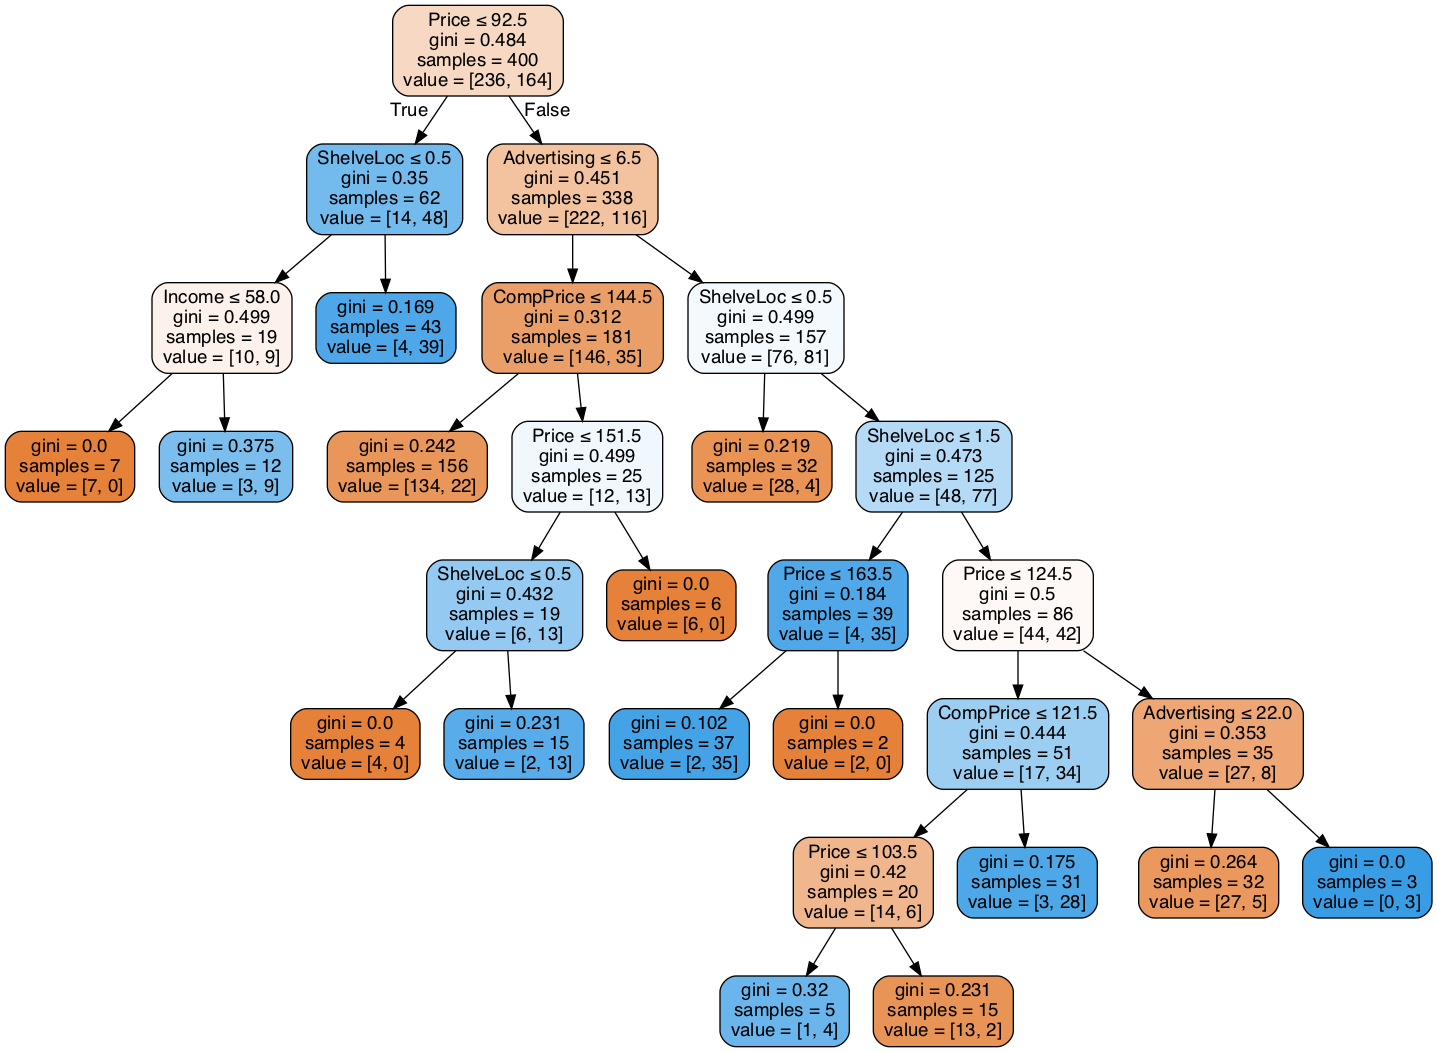

In [82]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(clf_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=X.columns)
# 아까처럼 컬럼 순서가 아니라 직접 컬럼 이름을 보기 위해서는....위의 feature_names를 사용
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

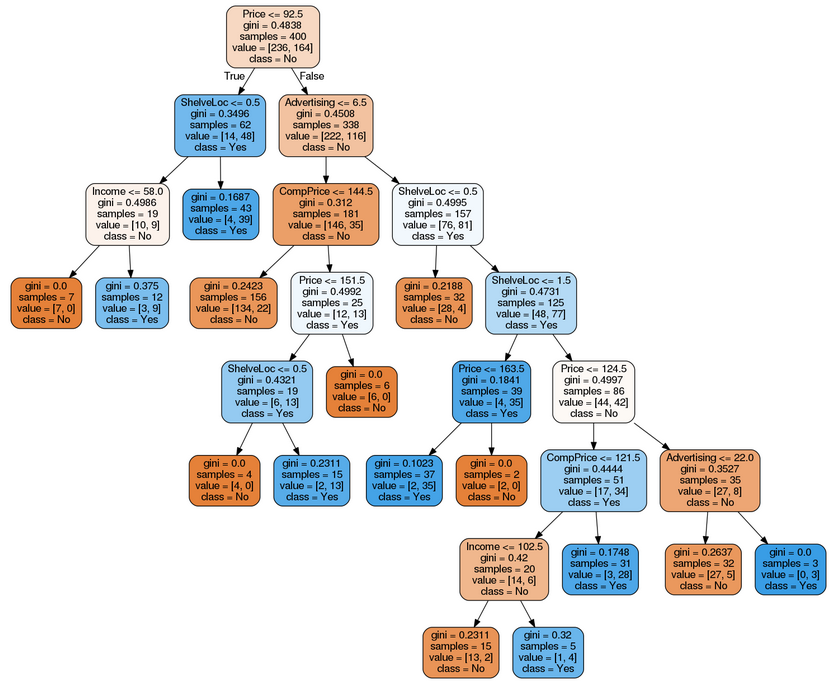

In [92]:
no = "050"
w = 800
img_path1 = "/Users/minkyukwon/PycharmProjects/MachineLearning_Course/10_1_ML_Intro/ref_img/img_"
img_path2 = ".png"
img_path = img_path1 + no + img_path2
Image(filename=img_path, width=w)

### Step2  
* 이 데이터를 가지고 Train/Test로 나누어서 해보자.

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)
clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=15)
clf_tree.fit(X_train, y_train)

y_pred = clf_tree.predict(X_test)

accuracy_score(y_test, y_pred)

0.775

###  Step3  
* 최적의 잎 갯수 찾기 : cv이용해서~

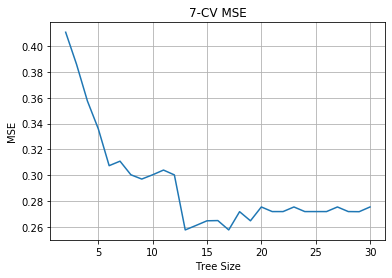

In [134]:
tree_sizes = range(2, 31)
MSE_scores = []
# 7 으로..7-fold
# 여기서는 원본에서 다시 자기가 알아서 cv해주는 것이니 이에서 한 train/test로 들어가는게 아님!!!
for size in tree_sizes:
    clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=size, random_state=1234)
    MSE_s = 1-cross_val_score(clf_tree, X_train, y_train, cv=7, scoring="accuracy")
    MSE_scores.append(np.mean(MSE_s))
    
# plot CV-MSE as tree size gets bigger 
plt.plot(tree_sizes, MSE_scores)
plt.title('7-CV MSE')
plt.xlabel('Tree Size')
plt.ylabel('MSE')
plt.grid(True)

* 약 17개의 정도에서 최적화가 되는 듯..

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)
clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=17)
clf_tree.fit(X_train, y_train)

y_pred = clf_tree.predict(X_test)

accuracy_score(y_test, y_pred)

0.775

In [113]:
# 위의 그림이 안 보이기 때문에....
feature_importance=pd.DataFrame({'feature':X.columns,
                                 'importance':clf_tree.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
5,ShelveLoc,0.230507
4,Price,0.228563
2,Advertising,0.166148
6,Age,0.155290
0,CompPrice,0.135268
1,Income,0.084225
3,Population,0.000000
7,Education,0.000000
8,Urban,0.000000
9,US,0.000000


### Step4  
* one-hot-encoding 적용

In [114]:
Carseats = pd.read_csv(path)
print (Carseats.shape)
Carseats.head(3)

(400, 12)


,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


In [115]:
# 1컬럼은 필요가 없어서 제거
Carseats = pd.read_csv(path)
del Carseats["Unnamed: 0"]
print( Carseats.shape)
Carseats.head(3)

(400, 11)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


In [116]:
Carseats['High'] = Carseats["Sales"].apply(lambda x : 0 if x<=8 else 1)

# one-hot-encoding
Carseats_enc = pd.get_dummies(Carseats, drop_first=True)

X = Carseats_enc.drop(['Sales', 'High'], axis=1)
y = Carseats_enc["High"]

# 15개 잎으로 제한.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)
clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=15)
clf_tree.fit(X_train, y_train)

y_pred = clf_tree.predict(X_test)

accuracy_score(y_test, y_pred)

0.7916666666666666

In [117]:
Carseats_enc.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,High,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,1,0,1,1
2,10.06,113,35,10,269,80,59,12,1,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,0,1,0


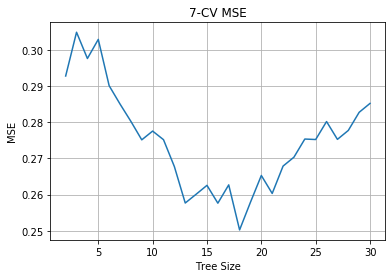

In [118]:
tree_sizes = range(2, 31)

MSE_scores = []
# 7 으로..7-fold
# 여기서는 원본에서 다시 자기가 알아서 cv해주는 것이니 이에서 한 train/test로 들어가는게 아님!!!
for size in tree_sizes:
    clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=size, random_state=1234)
    MSE_s = 1-cross_val_score(clf_tree, X, y, cv=7, scoring='accuracy')
    MSE_scores.append(np.mean(MSE_s))

# plot CV-MSE as tree size gets bigger 
plt.plot(tree_sizes, MSE_scores)
plt.title('7-CV MSE')
plt.xlabel('Tree Size')
plt.ylabel('MSE')
plt.grid(True)

In [119]:
# 18개 잎으로 제한.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)
clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=18)
clf_tree.fit(X_train, y_train)

y_pred = clf_tree.predict(X_test)

print (accuracy_score(y_test, y_pred))

0.775


* 어찌되었든, one-hot-encoding으로 한 결과가 거의 비슷;;;

# Random Forest

* feature 수(max_features), minimum sample 개수(min_samples_split), maximum depth(max_depth) 등을 cross-validation 통해 결정할 수 있다.
* 중요한 parameter는 'n_estimators'와 'max_features'. n_estimator는 클수록 좋지만 대개 300 에서 시작해 성능을 보아가며 조정

In [120]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [121]:
# 앞에서 사용한 one-hot-encoding  데이터 이용!!!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)


# tree를 500개, split할 때 6개 feature 중에서 선택 
RF_cif = RandomForestClassifier(n_estimators=500, max_features=6, random_state=1234)

# Training set으로 RF regressor 학습 
RF_cif.fit(X_train, y_train)

# Test with Test Set
y_pred = RF_cif.predict(X_test)


print (accuracy_score(y_test, y_pred))

0.8916666666666667


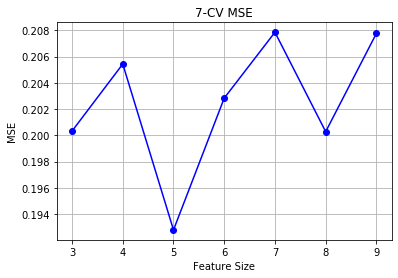

In [122]:
feature_sizes = range(3, 10)
MSE_scores = []

# 7-Fold CV for each tree  
for size in feature_sizes:
    RF_cif = RandomForestClassifier(n_estimators=500, max_features=size,random_state=1234, n_jobs=-1)
    MSE_s = 1-cross_val_score(RF_cif, X, y, cv=7, scoring='accuracy', n_jobs=-1)
    MSE_scores.append(np.mean(MSE_s))
    
# plot CV-MSE as tree size gets bigger 
plt.plot(feature_sizes, MSE_scores, 'bo-')
plt.title('7-CV MSE')
plt.xlabel('Feature Size')
plt.ylabel('MSE')
plt.grid(True)



* 5일때 제일 좋고, MSE=0.192정도..

In [123]:

# tree를 500개, split할 때 5개 feature 중에서 선택 
RF_cif = RandomForestClassifier(n_estimators=500, max_features=5, random_state=1234)

# Training set으로 RF regressor 학습 
RF_cif.fit(X_train, y_train)

# Test with Test Set
y_pred = RF_cif.predict(X_test)


print (accuracy_score(y_test, y_pred))

0.875


In [124]:
Importance=pd.DataFrame({'feature':X.columns, 'importance':RF_cif.feature_importances_}).sort_values(by='importance', ascending=False)
Importance

,feature,importance
4,Price,0.207843
5,Age,0.133307
2,Advertising,0.131635
0,CompPrice,0.122846
1,Income,0.108643
7,ShelveLoc_Good,0.102233
3,Population,0.076193
6,Education,0.054516
8,ShelveLoc_Medium,0.033893
10,US_Yes,0.015427


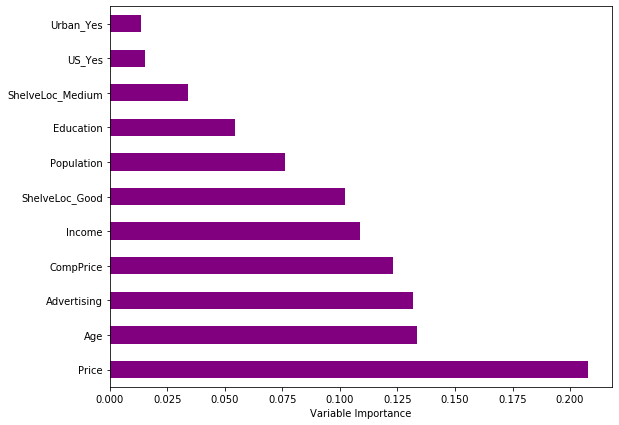

In [125]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(9,7)) 

Importance.plot(kind='barh', color='purple', ax=ax1)
y_pos = np.arange(len(Importance))
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.yticks(y_pos, Importance.feature)
plt.show()